<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/MAIN_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopy.distance
import seaborn as sns

In [ ]:
#import CSV file
path = '/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv'

#loading DF
df_import = pd.read_csv(path)

df = df_import.copy()

In [ ]:
#take a look top 5 rows

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#take a look bottom 5  rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#check null
df.isna().sum(axis = 0) 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#droping null value from NAME and HOST_NAME 
df_no_null = df.dropna(axis = 0 , subset=['name','host_name'] )
df_no_null.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_no_null['last_review'] = df_no_null['last_review'].astype('datetime64[ns]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_no_null['year'] = df_no_null['last_review'][df_no_null['last_review'].notna()].apply(lambda x: x.year)
df_no_null['month'] = df_no_null['last_review'][df_no_null['last_review'].notna()].apply(lambda x: x.month)
df_no_null['year'] = df_no_null['year'].astype('Int64')
df_no_null['month'] = df_no_null['month'].astype('Int64')
df_no_null['total_cost'] = df_no_null['price']  *df_no_null['minimum_nights']
df_no_null['availability_365'][ df_no_null['availability_365'] < 31 ] = 30
df_no_null['price'][ df_no_null['price'] < 11 ] = 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# What can we learn about different hosts and areas?

In [ ]:
df_no_null.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,149


In [ ]:
 df_no_null.groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
host_id,,,,,,,,,,,,
107434423,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,59175,56529,81,2258580
271248669,36056808,40.71206,-74.00999,6500,180,0,0.00,1,365,0,0,1170000
30283594,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,86750,273,1164243
20582832,7003697,40.76810,-73.91651,10000,100,2,0.04,1,30,2016,2,1000000
3906464,9528920,40.71355,-73.98507,9999,99,6,0.14,1,83,2016,1,989901


In [ ]:
df_no_null[['name','neighbourhood','host_name','host_id','total_cost']].groupby(['neighbourhood','host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=True).head(5)

,,total_cost
neighbourhood,host_id,
Williamsburg,10132166,0
Murray Hill,13709292,0
Harlem,33511962,10
Sunset Park,167570251,10
Jamaica,97001292,10


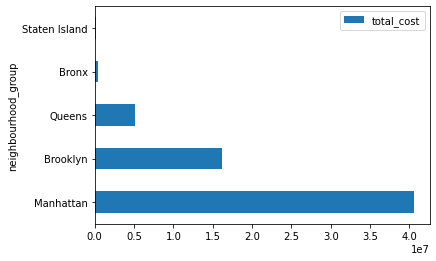

In [ ]:
#which neighbourhood_group can make most money 
df_no_null[['neighbourhood_group','total_cost']].groupby(['neighbourhood_group']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(5).plot(kind = 'barh')

In [ ]:
df_no_null[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20) 

,total_cost
neighbourhood,
Midtown,4797807
Upper West Side,4468250
Williamsburg,3925820
Hell's Kitchen,3756337
Upper East Side,2914393
East Village,2642897
Chelsea,2516384
Bedford-Stuyvesant,2467829
Astoria,2184600


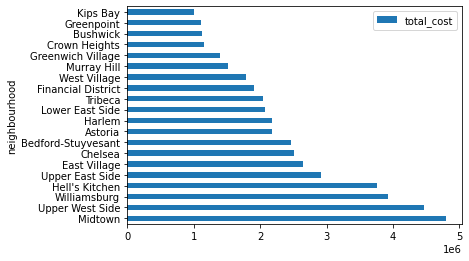

In [ ]:
#which neighbourhood  make most money 
df_no_null[['neighbourhood','total_cost']].groupby(['neighbourhood']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)


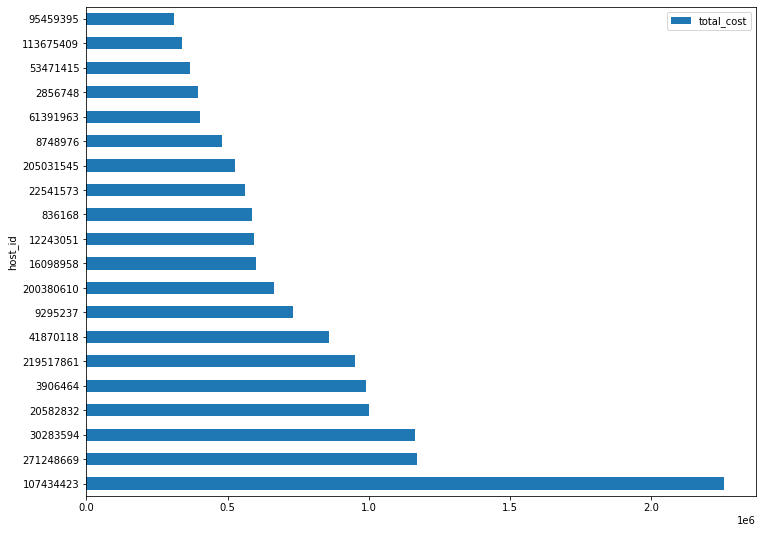

In [ ]:
#which host_id can make most money 
df_no_null[['host_id','total_cost']].groupby(['host_id']).sum('total_cost').sort_values(by = 'total_cost',ascending=False).head(20).plot(kind = 'barh')
plt.rcParams["figure.figsize"] = (12,9)

*where* host prefer most

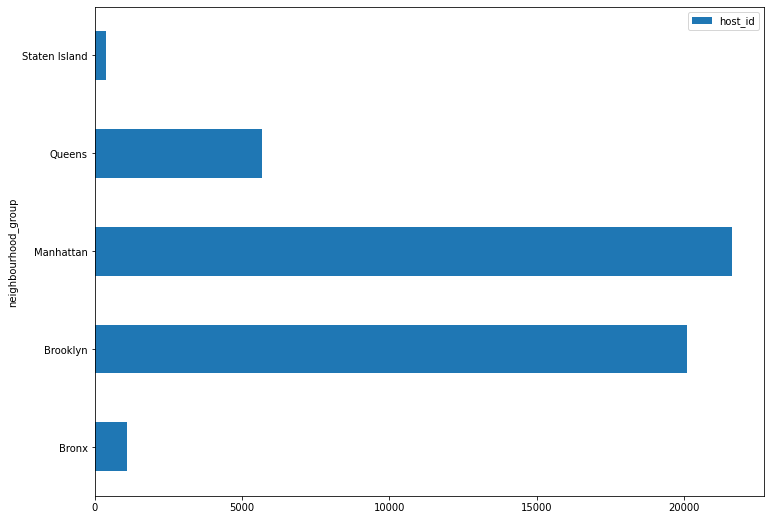

In [ ]:
df_no_null[['neighbourhood_group','host_id']].groupby('neighbourhood_group').count().plot(kind = 'barh')

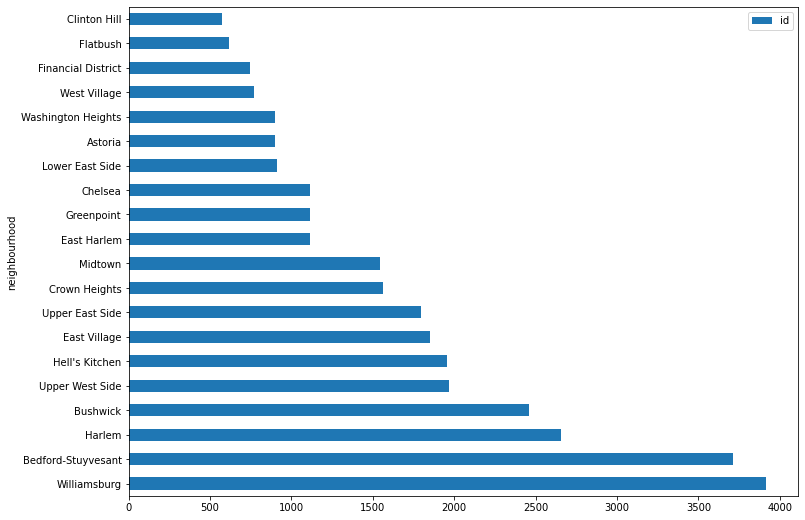

In [ ]:
#which neighbourhood have most number of host
df_no_null[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by = 'id', ascending = False).head(20).plot(kind = 'barh')

#What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
df_no_null

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,<NA>,<NA>,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,30,2018,11,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,30,<NA>,<NA>,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,<NA>,<NA>,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,30,<NA>,<NA>,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,30,<NA>,<NA>,55


#Which hosts are the busiest and why?

In [ ]:
df_no_null

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,<NA>,<NA>,450
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,7,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,30,2018,11,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,30,<NA>,<NA>,140
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,<NA>,<NA>,160
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,30,<NA>,<NA>,1150
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,30,<NA>,<NA>,55


#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
df_no_null.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,48858.000000,48858.000000,38821.000000,38821.000000,4.885800e+04
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.742560,7.012444,23.273098,1.373229,7.148369,125.464243,2018.288323,6.173901,1.276939e+03
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.231001,20.019757,44.549898,1.680328,32.964600,121.241946,1.180598,2.531374,1.167041e+04
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,30.000000,2011.000000,1.000000,0.000000e+00
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,30.000000,2018.000000,5.000000,1.350000e+02
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2019.000000,6.000000,3.000000e+02
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,2019.000000,7.000000,7.350000e+02
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,1.170000e+06


In [ ]:
df_no_null.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,total_cost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,149


In [ ]:
df_no_null[['neighbourhood_group','availability_365']].groupby('neighbourhood_group').sum('availability_365').sort_values(by = 'availability_365', ascending = False) 

,availability_365
neighbourhood_group,
Manhattan,2710343
Brooklyn,2289072
Queens,867526
Bronx,187042
Staten Island,75949


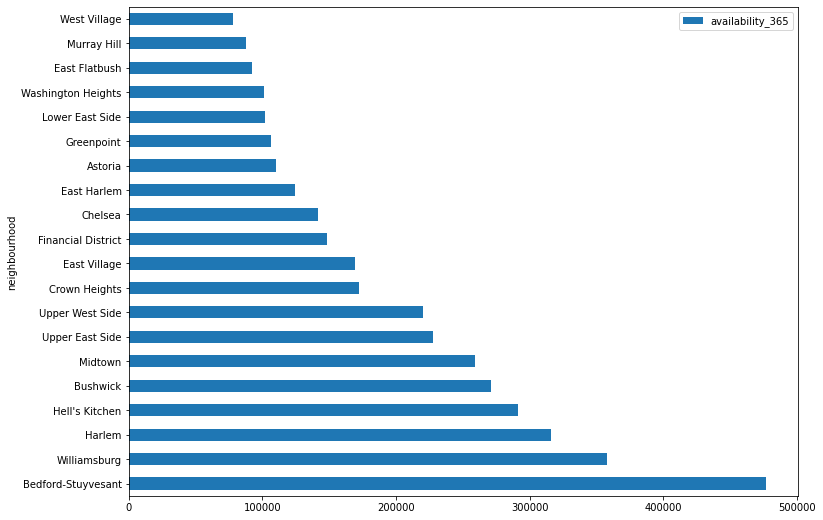

In [ ]:
df_no_null[['neighbourhood','availability_365']].groupby('neighbourhood').sum('availability_365').sort_values(by = 'availability_365', ascending = False).head(20).plot(kind = 'barh')

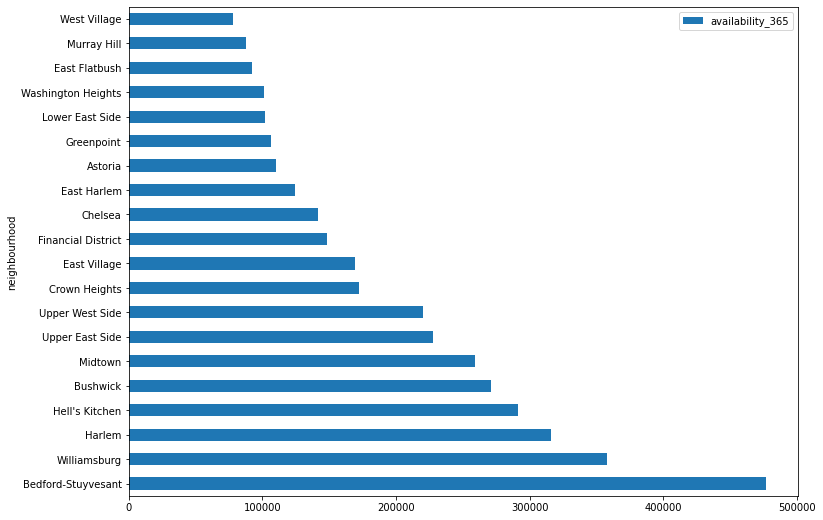

In [ ]:
df_no_null[['neighbourhood','availability_365']].groupby('neighbourhood').sum('availability_365').sort_values(by = 'availability_365', ascending = False).head(20).plot(kind = 'barh')

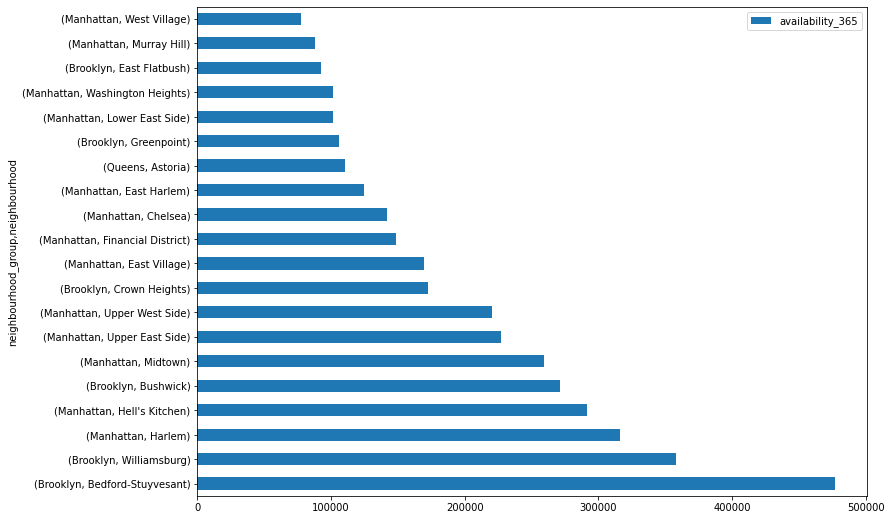

In [ ]:
df_no_null[['neighbourhood_group','neighbourhood','availability_365']].groupby(['neighbourhood_group','neighbourhood']).sum('availability_365').sort_values(by = 'availability_365', ascending = False).head(20).plot(kind = 'barh')

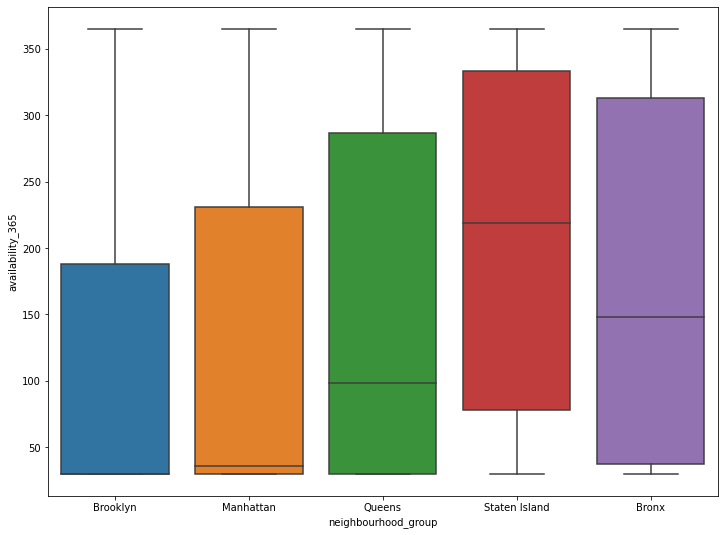

In [ ]:
ax = sns.boxplot( x = df_no_null['neighbourhood_group'] , y = df_no_null['availability_365'] , data =  df_no_null['price'] ) 

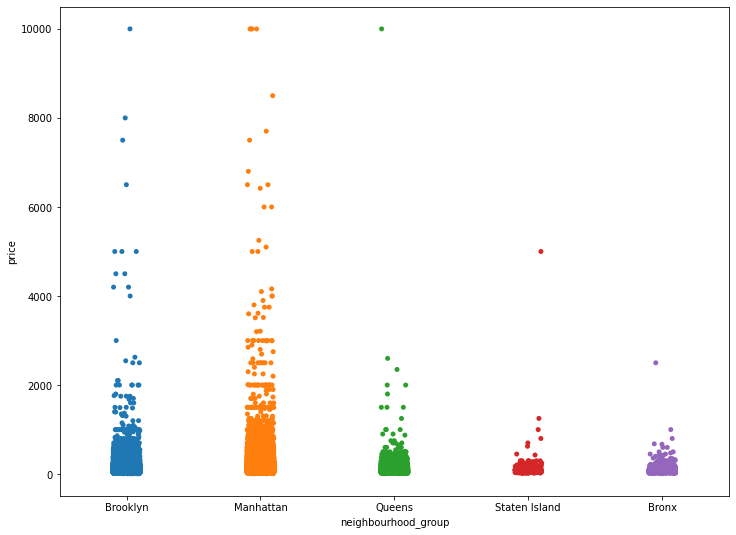

In [ ]:
ax = sns.stripplot( x = df_no_null['neighbourhood_group'] , y = df_no_null['price'] , data =  df_no_null['availability_365'] )

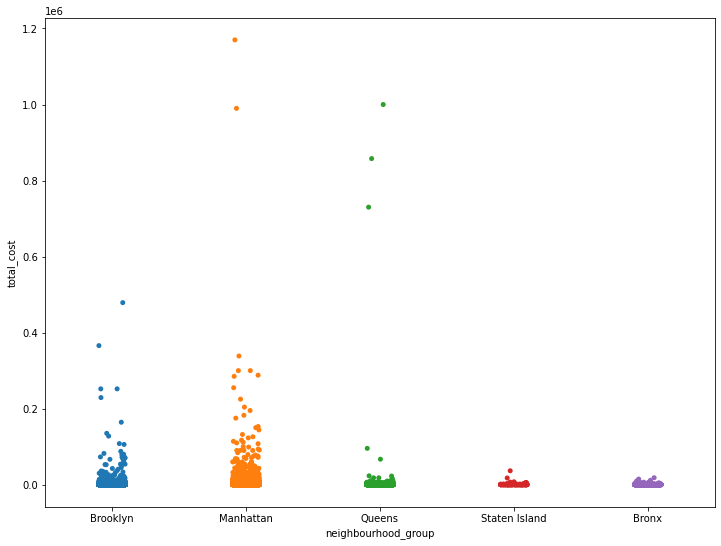

In [ ]:
ax = sns.stripplot( x = df_no_null['neighbourhood_group'] , y = df_no_null['total_cost'] , data =  df_no_null['availability_365'] )